<a href="https://colab.research.google.com/github/VitikaJain25/Data_Science/blob/master/BaselineRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# We are taking a clean dataset
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

automobile_df = pd.read_csv(io.BytesIO(uploaded['cars_processed.csv']))

Saving cars_processed.csv to cars_processed (6).csv


In [76]:
automobile_df.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,49
1,16.000000,8,304.0,150,3433,12.0,US,49
2,17.000000,8,302.0,140,3449,10.5,US,49
3,14.000000,8,454.0,220,4354,9.0,US,49
4,23.551429,8,440.0,215,4312,8.5,US,49


In [77]:
automobile_df.shape

(387, 8)

In [0]:
# Simple Regression using a single feature
# We will see of we can use 'Age' to predict 'MPG'
X = automobile_df[['Age']]
Y = automobile_df ['MPG']

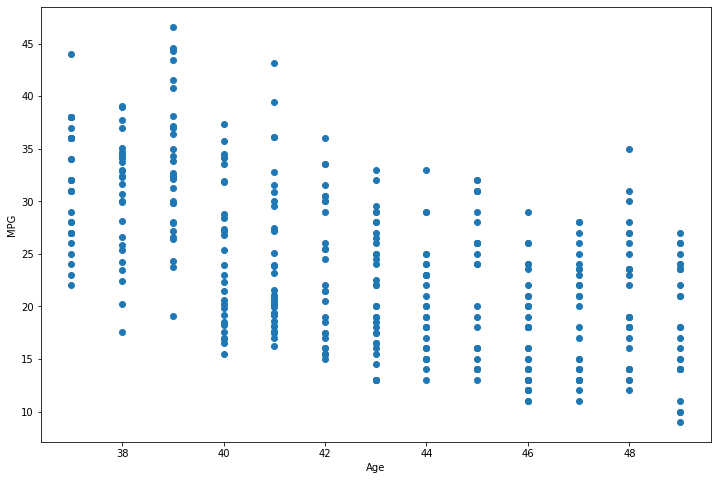

In [79]:
# Visualizing the relation between Age and MPG using scatter plot
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(automobile_df['Age'], automobile_df['MPG'])
plt.xlabel('Age')
plt.ylabel('MPG')

plt.show()

# We can see that older cars tend to have low mileage
# So its a good candidate for our simple regression.
# We will use age to predict mileage.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [81]:
# Normalize = True -> Our X features will be normalized before regression in performed.
# It will center all your x features around a mean of zero.
# This makes it easier for you machine learning model to work with data.
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize = True)
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [82]:
print("Training Score", linear_model.score(x_train, y_train))

# Since the score is not very great, may be this was not the best feature to choose.

Training Score 0.32017576252531454


In [0]:
# Making Prediction for x_test
y_pred = linear_model.predict(x_test)

In [84]:
# Measure of how rubust our linear model is its r2 score on test data.
# Can be calculated by r2 function available in sckit-learn
# We pass our predictions and the actual values

from sklearn.metrics import r2_score

print("Testing Score: ", r2_score(y_test, y_pred))
# Not a great Score.

Testing Score:  0.3148526110632034


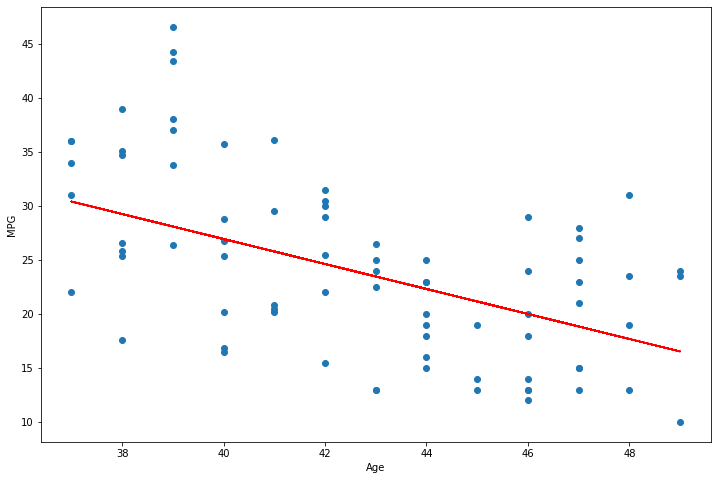

In [85]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'r')

plt.xlabel('Age')
plt.ylabel('MPG')
plt.show()

# Scatter plot of our original data points and linear model predictions.
# Our model prediction will be in a straight line as its a linear model
# This fit is not so great as there are many data points far away from this line.

In [86]:
# Choosing 'HorsePower' now to do simple linear regression.
# Using Horsepower to predict the mileage of the car.
X = automobile_df[['Horsepower']]
Y = automobile_df ['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

linear_model = LinearRegression(normalize = True)
linear_model.fit(x_train, y_train)

print("Training Score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print("Testing Score: ", r2_score(y_test, y_pred))

# Scores are much better now
# Looks like the feature 'HorsePower' has far more predictive power  for mileage as compared to Age of the car

Training Score:  0.5958362306139953
Testing Score:  0.5281057839189807


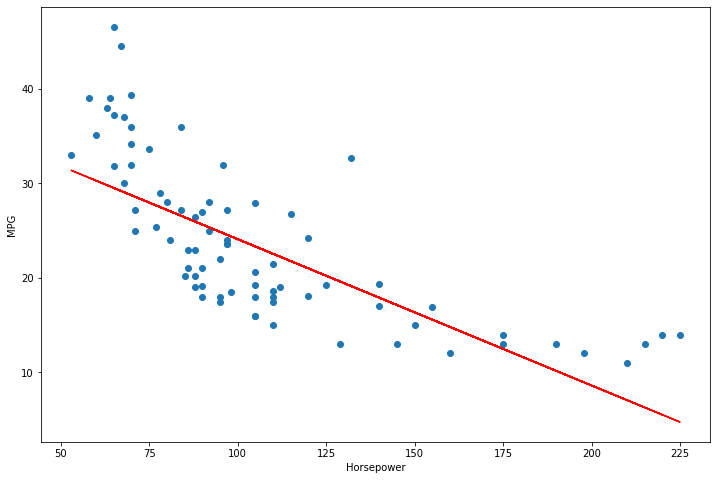

In [87]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'r')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

# This time the line fits the data points much better
# The points are closer to the line.

Multiple Regression - Using Multiple features

In [88]:
automobile_df.head()
# Now we will use multiple features to predict the mileage of the car.

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,49
1,16.000000,8,304.0,150,3433,12.0,US,49
2,17.000000,8,302.0,140,3449,10.5,US,49
3,14.000000,8,454.0,220,4354,9.0,US,49
4,23.551429,8,440.0,215,4312,8.5,US,49


In [0]:
# As we can see, all the columns are numeric except the 'Origin' column
# 'Origin' column contains discrete values which we need to convert to numeric form. 
# One way of converting discrete values to numeric form is by using 'One Hot Encoding'
automobile_df = pd.get_dummies(automobile_df, columns=['Origin'])

In [92]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age,Origin_Europe,Origin_Japan,Origin_US
131,14.000000,8,304.0,150,4257,15.5,45,0,0,1
194,29.500000,4,97.0,71,1825,12.2,43,1,0,0
37,23.551429,8,318.0,150,4096,13.0,48,0,0,1
77,23.551429,4,120.0,97,2506,14.5,47,0,1,0
244,20.500000,6,200.0,95,3155,18.2,41,0,0,1


In [93]:
# This time we will train our linear regression model using all the features except MPG.
# As, MPG is the target that we are trying to predict.
X = automobile_df.drop('MPG', axis = 1)
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

linear_model = LinearRegression(normalize = True)
linear_model.fit(x_train, y_train)

print("Training Score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print("Testing Score: ", r2_score(y_test, y_pred))

# Much better model than earlier model which was trained using a single feature.

Training Score:  0.8148673821649614
Testing Score:  0.742185171982242
